<a href="https://colab.research.google.com/github/HR0262/PCMCI-in-commuter-trian/blob/main/PCMCI-0427-diff-increase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tigramite
!pip install dcor

In [ ]:
# Imports
import numpy as np
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import pandas as pd
import pickle
import networkx as nx

In [ ]:
import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI
from tigramite.jpcmciplus import JPCMCIplus

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS
from tigramite.independence_tests.gpdc import GPDC

from tigramite.plotting import plot_time_series_graph
from tigramite.plotting import plot_graph

In [58]:
df = pd.read_csv(r"/content/data_4041_20230427_diff.csv", index_col=0)
#df.drop(columns=['Unnamed: 0'], inplace=True)
df.index.name = None
display(df)

,1_Tumba - 2_Tullinge,2_Tullinge - 3_Flemingsberg,3_Flemingsberg - 4_Huddinge,4_Huddinge - 5_Stuvsta,5_Stuvsta - 6_Älvsjö,6_Älvsjö - 7_Årstaberg,7_Årstaberg - 8_Stockholms södra,8_Stockholms södra - 9_Stockholm City,9_Stockholm City - 10_Stockholm Odenplan,10_Stockholm Odenplan - 11_Solna,11_Solna - 12_Ulriksdal,12_Ulriksdal - 13_Helenelund,13_Helenelund - 14_Sollentuna,14_Sollentuna - 15_Häggvik,15_Häggvik - 16_Norrviken,16_Norrviken - 17_Rotebro,17_Rotebro - 18_Upplands Väsby
0_41,-2.0,40.0,-9.0,-39.0,-32.0,62.0,-7.0,15.0,41.0,-42.0,-44.0,54.0,-16.0,-54.0,89.0,-33.0,-17.0
1_40,-3.0,13.0,-10.0,-20.0,-23.0,78.0,8.0,9.0,16.0,-33.0,-38.0,23.0,-12.0,-58.0,40.0,-14.0,21.0
2_41,-77.0,11.0,-4.0,-30.0,-25.0,58.0,-4.0,19.0,53.0,-32.0,-39.0,37.0,-11.0,-50.0,87.0,-27.0,-7.0
3_41,-6.0,4.0,0.0,-16.0,-46.0,51.0,16.0,29.0,-13.0,-25.0,-33.0,48.0,5.0,-56.0,69.0,-28.0,-4.0
4_41,-19.0,1.0,-11.0,-19.0,-27.0,52.0,5.0,14.0,8.0,-36.0,-21.0,22.0,-22.0,-35.0,88.0,-23.0,-4.0
5_40,4.0,105.0,8.0,-24.0,-44.0,13.0,8.0,25.0,-33.0,-37.0,-34.0,8.0,-11.0,-58.0,13.0,-26.0,-18.0
6_41,-9.0,4.0,-8.0,-19.0,-37.0,69.0,10.0,24.0,23.0,-7.0,303.0,20.0,-16.0,-50.0,68.0,-23.0,11.0
7_41,10.0,32.0,18.0,-4.0,-29.0,21.0,41.0,52.0,28.0,-4.0,-7.0,29.0,1.0,-24.0,72.0,-28.0,-5.0
8_40,-18.0,8.0,62.0,-31.0,-57.0,221.0,-4.0,18.0,77.0,-38.0,-37.0,-1.0,-17.0,-47.0,-11.0,-7.0,-2.0
9_41,-56.0,3.0,-10.0,-24.0,-38.0,148.0,31.0,20.0,65.0,14.0,-29.0,16.0,-18.0,-71.0,53.0,-3.0,11.0


In [164]:
df_delay = df
df_delay = df_delay.where(df_delay >= 0, 0)
df_delay

,1_Tumba - 2_Tullinge,2_Tullinge - 3_Flemingsberg,3_Flemingsberg - 4_Huddinge,4_Huddinge - 5_Stuvsta,5_Stuvsta - 6_Älvsjö,6_Älvsjö - 7_Årstaberg,7_Årstaberg - 8_Stockholms södra,8_Stockholms södra - 9_Stockholm City,9_Stockholm City - 10_Stockholm Odenplan,10_Stockholm Odenplan - 11_Solna,11_Solna - 12_Ulriksdal,12_Ulriksdal - 13_Helenelund,13_Helenelund - 14_Sollentuna,14_Sollentuna - 15_Häggvik,15_Häggvik - 16_Norrviken,16_Norrviken - 17_Rotebro,17_Rotebro - 18_Upplands Väsby
0_41,0.0,40.0,0.0,0.0,0.0,62.0,0.0,15.0,41.0,0.0,0.0,54.0,0.0,0.0,89.0,0.0,0.0
1_40,0.0,13.0,0.0,0.0,0.0,78.0,8.0,9.0,16.0,0.0,0.0,23.0,0.0,0.0,40.0,0.0,21.0
2_41,0.0,11.0,0.0,0.0,0.0,58.0,0.0,19.0,53.0,0.0,0.0,37.0,0.0,0.0,87.0,0.0,0.0
3_41,0.0,4.0,0.0,0.0,0.0,51.0,16.0,29.0,0.0,0.0,0.0,48.0,5.0,0.0,69.0,0.0,0.0
4_41,0.0,1.0,0.0,0.0,0.0,52.0,5.0,14.0,8.0,0.0,0.0,22.0,0.0,0.0,88.0,0.0,0.0
5_40,4.0,105.0,8.0,0.0,0.0,13.0,8.0,25.0,0.0,0.0,0.0,8.0,0.0,0.0,13.0,0.0,0.0
6_41,0.0,4.0,0.0,0.0,0.0,69.0,10.0,24.0,23.0,0.0,303.0,20.0,0.0,0.0,68.0,0.0,11.0
7_41,10.0,32.0,18.0,0.0,0.0,21.0,41.0,52.0,28.0,0.0,0.0,29.0,1.0,0.0,72.0,0.0,0.0
8_40,0.0,8.0,62.0,0.0,0.0,221.0,0.0,18.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9_41,0.0,3.0,0.0,0.0,0.0,148.0,31.0,20.0,65.0,14.0,0.0,16.0,0.0,0.0,53.0,0.0,11.0


# PCMCI 用车站作为列，车次作为行 分析

分析车站之间的因果关系

In [165]:
dataframe = pp.DataFrame(data = df_delay.values, var_names = df_delay.columns)

In [166]:
parcorr = ParCorr(significance='analytic')
robust_parcorr=RobustParCorr(significance='analytic')
gpdc = GPDC()

# 早高峰
# 筛选前后
cond_ind_test=gpdc #非线性关系
pcmci = PCMCI(
    dataframe=dataframe,
    cond_ind_test=cond_ind_test,
    verbosity=1)
tau_max = 3 #评价影响几个车次，1-10个数多少
pc_alpha = 0.05
pcmci.verbosity = 1

# results = pcmci.run_pcmciplus(tau_min=0, tau_max=tau_max, pc_alpha=pc_alpha)
results = pcmci.run_pcmci(tau_min=0, tau_max=tau_max, pc_alpha=None,alpha_level=0.05,max_conds_dim=None)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = gp_dc
tau_min = 1
tau_max = 3
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1




/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning:


## Resulting lagged parent (super)sets:

    Variable 1_Tumba - 2_Tullinge has 2 link(s):
    [pc_alpha = 0.2]
        (9_Stockholm City - 10_Stockholm Odenplan -3): max_pval = 0.10400, |min_val| =  0.513
        (15_Häggvik - 16_Norrviken -2): max_pval = 0.14600, |min_val| =  0.493

    Variable 2_Tullinge - 3_Flemingsberg has 5 link(s):
    [pc_alpha = 0.5]
        (17_Rotebro - 18_Upplands Väsby -1): max_pval = 0.08400, |min_val| =  0.526
        (2_Tullinge - 3_Flemingsberg -2): max_pval = 0.32800, |min_val| =  0.418
        (13_Helenelund - 14_Sollentuna -3): max_pval = 0.37200, |min_val| =  0.405
        (1_Tumba - 2_Tullinge -2): max_pval = 0.39200, |min_val| =  0.403
        (11_Solna - 12_Ulriksdal -3): max_pval = 0.40400, |min_val| =  0.399

    Variable 3_Flemingsberg - 4_Huddinge has 2 link(s):
    [pc_alpha = 0.2]
        (11_Solna - 12_Ulriksdal -2): max_pval = 0.08400, |min_val| =  0.529
        (11_Solna - 12_Ulriksdal -1): max_pval = 0.11200, |min_val| =  0.508

    V

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning:


## Significant links at alpha = 0.05:

    Variable 1_Tumba - 2_Tullinge has 7 link(s):
        (9_Stockholm City - 10_Stockholm Odenplan -3): pval = 0.00200 | val =  0.722
        (4_Huddinge - 5_Stuvsta -3): pval = 0.00400 | val =  0.655
        (15_Häggvik - 16_Norrviken -2): pval = 0.01400 | val =  0.622
        (3_Flemingsberg - 4_Huddinge -3): pval = 0.01400 | val =  0.620
        (12_Ulriksdal - 13_Helenelund  0): pval = 0.02000 | val =  0.599 | unoriented link
        (10_Stockholm Odenplan - 11_Solna -3): pval = 0.04400 | val =  0.570
        (2_Tullinge - 3_Flemingsberg  0): pval = 0.04600 | val =  0.567 | unoriented link

    Variable 2_Tullinge - 3_Flemingsberg has 5 link(s):
        (11_Solna - 12_Ulriksdal -1): pval = 0.00200 | val =  0.732
        (17_Rotebro - 18_Upplands Väsby -1): pval = 0.00600 | val =  0.650
        (9_Stockholm City - 10_Stockholm Odenplan -1): pval = 0.03800 | val =  0.581
        (11_Solna - 12_Ulriksdal -3): pval = 0.04000 | val =  0.577
      

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


p_matrix[i, j, tau]	vs val_matrix[i, j, tau]

统计检验的 p 值（显著性），条件独立性检验的 统计量（强度），❌ 越小越显著，< 0.05 常用于筛选， 用来判断是否显著、有因果边

val_matrix[i, j, tau]，条件独立性检验的 统计量（强度），✅ 越大（或绝对值大）说明依赖更强，用来排序因果边强弱

用法p < 0.05 筛选显著因果边。用 p_matrix 做初步筛选，再用 val_matrix 判断因果强度。

# p_matrix 筛选 并计数不同tau下连接数



In [167]:
print(results.keys())

p_matrix=results['p_matrix']
print('p_matrix:')
print(p_matrix.shape)
array_1d_p_matrix = p_matrix.reshape(-1)
print(array_1d_p_matrix.shape)
print(len(array_1d_p_matrix[array_1d_p_matrix<0.05]))
graph=results['graph']
print('graph:')
print(graph.shape)
array_1d_graph = graph.reshape(-1)
print(array_1d_graph.shape)
print(len(array_1d_graph[array_1d_graph!='']))

dict_keys(['graph', 'p_matrix', 'val_matrix', 'conf_matrix'])
p_matrix:
(17, 17, 4)
(1156,)
84
graph:
(17, 17, 4)
(1156,)
91


对p_matrix进行筛选

后续站点不会对当前站点造成影响，当前站点的后续车次不会对当前造成影响

p_matrix[i,j,tau]<alpha_level 表示i站点在tau步前对j站点有因果影响

count数不同tau下的因果链接数量

In [168]:
p_matrix_clean = results['p_matrix'].copy()  # 不直接修改原始数据，避免污染

# 遍历所有 target, source, tau 组合
num_vars = p_matrix_clean.shape[0]
tau_max_plus1 = p_matrix_clean.shape[2]
print(p_matrix_clean.shape)
count=[0]*(tau_max+1)
alpha_level=0.05

for i in range(num_vars):       # target
    for j in range(num_vars):   # source
        for tau in range(tau_max_plus1):
            target_idx = j+1
            source_idx = i+1

            # 如果后续站点影响当前站点，则置为空字符串
            if source_idx >= target_idx:
              p_matrix_clean[i, j, tau] = 1
            elif p_matrix_clean[i, j, tau]<=alpha_level:
              count[tau]+=1


array_1d_p_matrix_clean = p_matrix_clean.reshape(-1)
print(array_1d_p_matrix_clean.shape)
print(len(array_1d_p_matrix_clean[array_1d_p_matrix_clean<=0.05]))
print(count)

(17, 17, 4)
(1156,)
47
[8, 11, 12, 16]


# 可视化部分

边上的数字是前n个站点的延误对当前站点的因果影响

节点颜色的深浅代表auto-MCI values，表明了过去车次对站点的因果影响

边的颜色深浅代表cross-MCI values，表明了其他站点对该站点的因果影响

(<Figure size 1200x600 with 1 Axes>, <Axes: >)

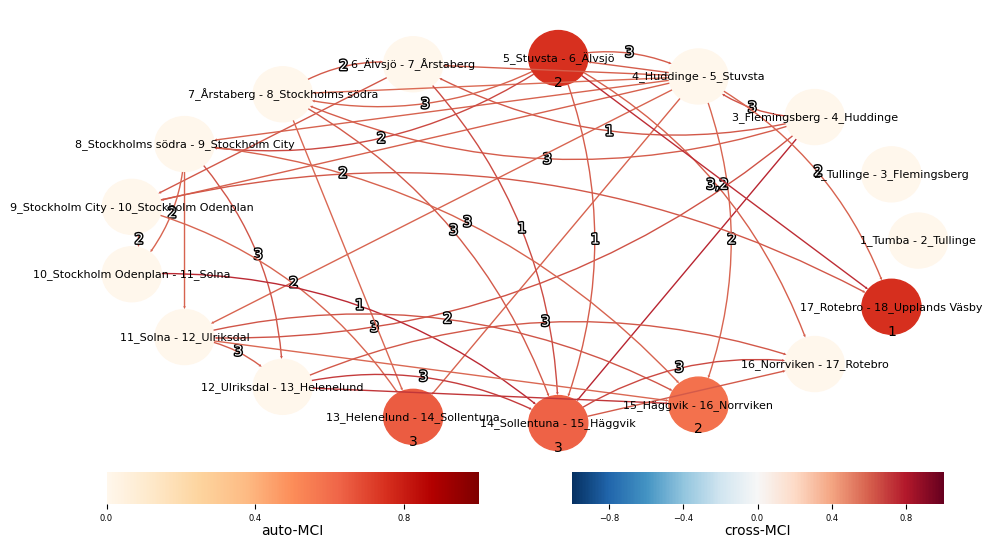

In [67]:
# 需要跟前面节点进行筛选配合，筛选p_matrix，val_matrix

# 设置显著性水平
alpha_level = 0.05

# 从 p_matrix 生成布尔型因果图
graph = pcmci.get_graph_from_pmatrix(
    p_matrix=p_matrix_clean,
    alpha_level=alpha_level,
    tau_min=0,
    tau_max=tau_max
)
# 绘图
plot_graph(
    graph=graph,
    val_matrix=results['val_matrix'],             # 测试统计值，通常是偏相关或其他统计量
    var_names=dataframe.var_names,                # 变量名称（你自己的时间序列名称）
    link_colorbar_label='cross-MCI',                # 显示边的颜色表示的含义（例如：偏相关系数）
    figsize=(12, 6),                              # 图像大小
    alpha=1.0,                                    # 图形的透明度
    arrow_linewidth=1.0,                          # 箭头的线宽
    node_size=0.3,                                # 节点大小
    curved_radius=0.2,                            # 边的弯曲度
    label_fontsize=10,                            # 标签字体大小
    node_label_size=8,                           # 节点标签字体大小
    cmap_edges='RdBu_r',                          # 边的颜色映射（红蓝渐变）
    cmap_nodes='OrRd',                            # 节点的颜色映射
    show_colorbar=True,                           # 显示颜色条
    show_autodependency_lags=True,                # 显示自依赖延迟
    vmin_edges=-1,                                # 边的颜色条范围
    vmax_edges=1.0,                               # 边的颜色条范围
    vmin_nodes=0,                                 # 节点颜色条范围
    vmax_nodes=1.0                                # 节点颜色条范围
)

(<Figure size 1200x1000 with 1 Axes>, <Axes: >)

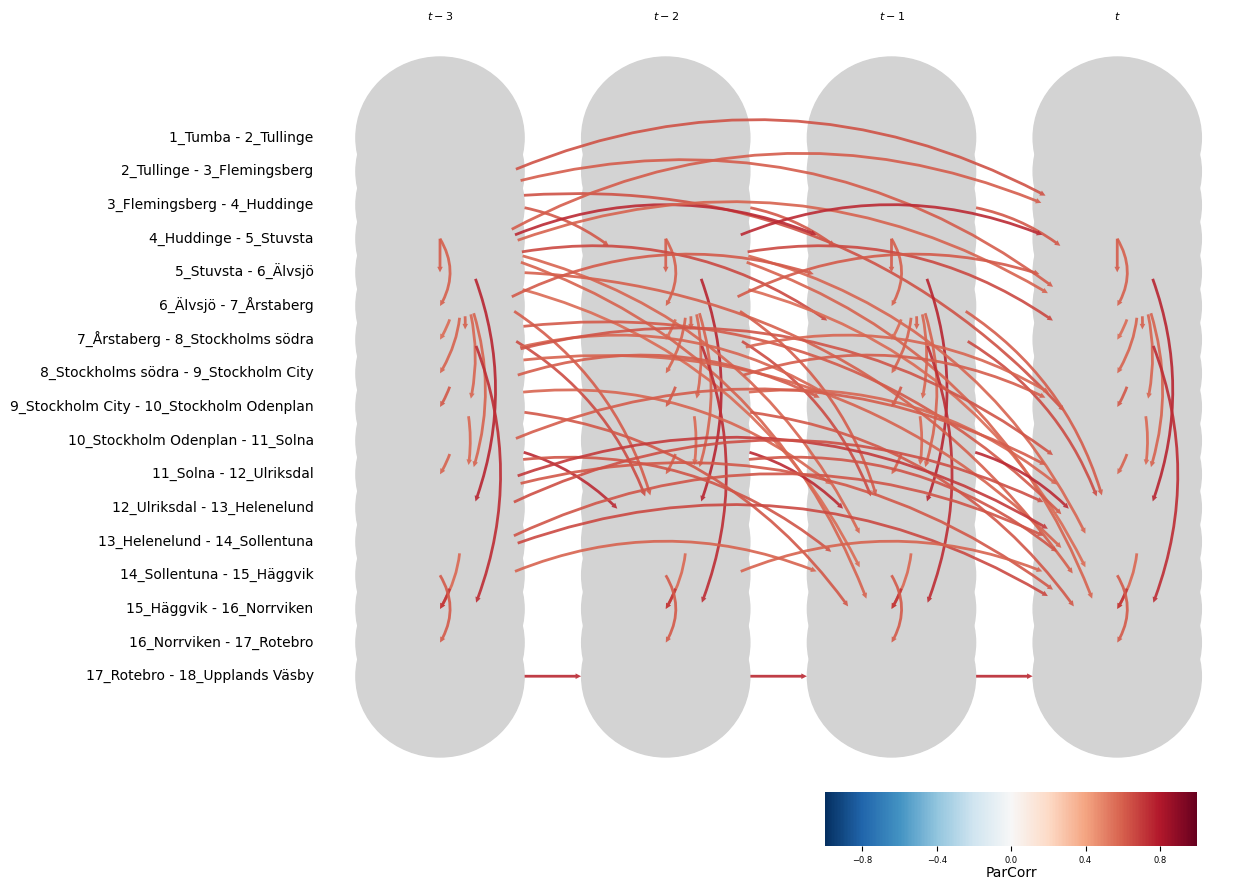

In [66]:
# 设置显著性水平
alpha_level = 0.05

# 从 p_matrix 生成布尔型因果图
graph = pcmci.get_graph_from_pmatrix(
    p_matrix=p_matrix_clean,
    alpha_level=alpha_level,
    tau_min=0,
    tau_max=tau_max
)

# 绘图
plot_time_series_graph(
    graph=graph,
    val_matrix=results['val_matrix'],             # 偏相关值/测试统计值
    var_names=dataframe.var_names,                # 节点名字
    link_colorbar_label='ParCorr',                # 显示偏相关值的图例
    figsize=(12, 10),                              # 图像大小
    alpha=0.9,                                    # 边透明度
    arrow_linewidth=2.0,                          # 箭头线宽
    node_size=0.3,                                # 节点大小
    curved_radius=0.3                             # 边曲率
)

(<Figure size 1200x600 with 1 Axes>, <Axes: >)

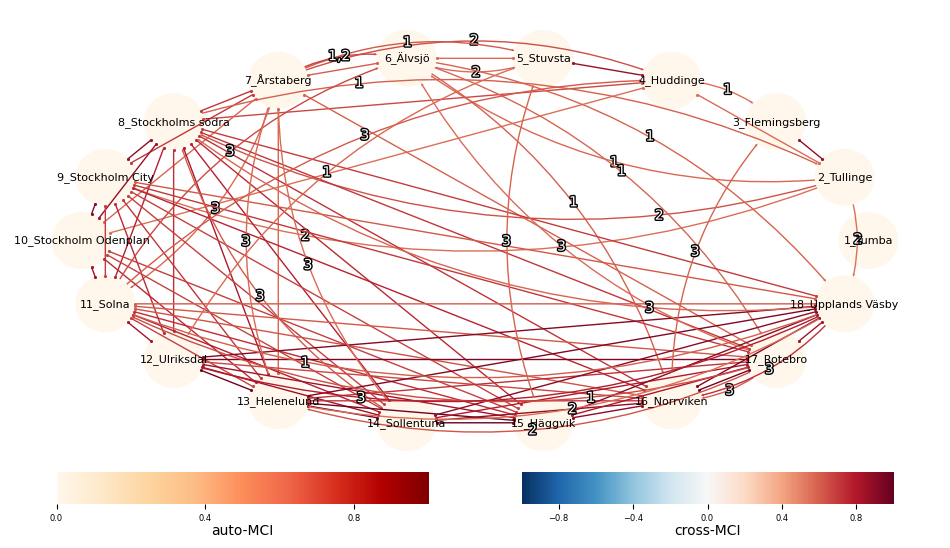

In [ ]:
# 从 p_matrix 生成布尔型因果图
graph = pcmci.get_graph_from_pmatrix(
    p_matrix=results['p_matrix'],
    alpha_level=alpha_level,
    tau_min=0,
    tau_max=tau_max
)
# 绘图
plot_graph(
    graph=graph,
    val_matrix=results['val_matrix'],             # 测试统计值，通常是偏相关或其他统计量
    var_names=dataframe.var_names,                # 变量名称（你自己的时间序列名称）
    link_colorbar_label='cross-MCI',                # 显示边的颜色表示的含义（例如：偏相关系数）
    figsize=(12, 6),                              # 图像大小
    alpha=1.0,                                    # 图形的透明度
    arrow_linewidth=1.0,                          # 箭头的线宽
    node_size=0.3,                                # 节点大小
    curved_radius=0.2,                            # 边的弯曲度
    label_fontsize=10,                            # 标签字体大小
    node_label_size=8,                           # 节点标签字体大小
    cmap_edges='RdBu_r',                          # 边的颜色映射（红蓝渐变）
    cmap_nodes='OrRd',                            # 节点的颜色映射
    show_colorbar=True,                           # 显示颜色条
    show_autodependency_lags=True,                # 显示自依赖延迟
    vmin_edges=-1,                                # 边的颜色条范围
    vmax_edges=1.0,                               # 边的颜色条范围
    vmin_nodes=0,                                 # 节点颜色条范围
    vmax_nodes=1.0                                # 节点颜色条范围
)

# 复杂网络

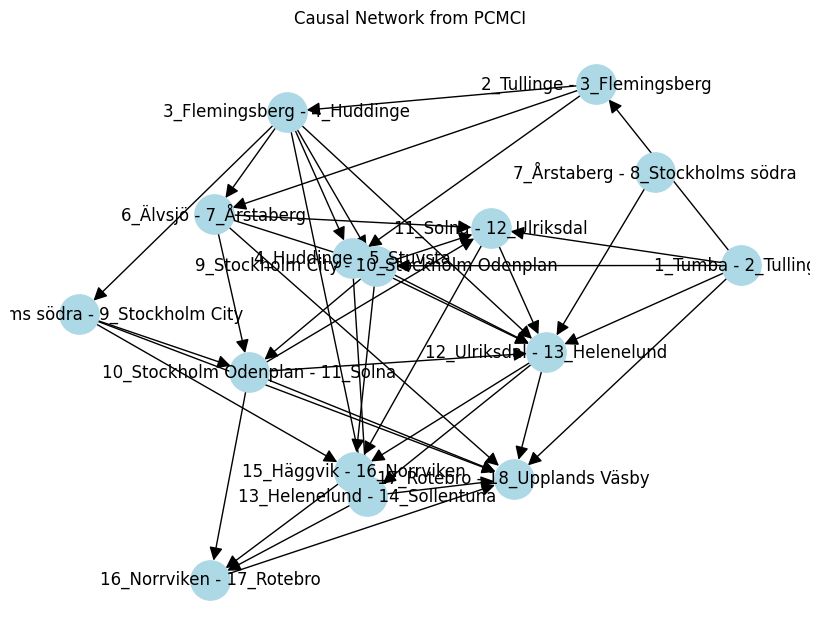

节点个数: 15
节点名称： ['1_Tumba - 2_Tullinge', '2_Tullinge - 3_Flemingsberg', '9_Stockholm City - 10_Stockholm Odenplan', '11_Solna - 12_Ulriksdal', '12_Ulriksdal - 13_Helenelund', '17_Rotebro - 18_Upplands Väsby', '3_Flemingsberg - 4_Huddinge', '4_Huddinge - 5_Stuvsta', '6_Älvsjö - 7_Årstaberg', '8_Stockholms södra - 9_Stockholm City', '13_Helenelund - 14_Sollentuna', '10_Stockholm Odenplan - 11_Solna', '7_Årstaberg - 8_Stockholms södra', '15_Häggvik - 16_Norrviken', '16_Norrviken - 17_Rotebro']


In [169]:
# 假设变量名是按顺序排布的
variable_names = df_delay.columns  # 填入你的站点名列表
n_vars = len(variable_names)
max_lag = graph.shape[2]  # tau_max + 1

r_pmatrix=results['p_matrix']
p_matrix_clean
v_matrix=results['val_matrix']

# 创建一个有向图
G = nx.DiGraph()

# 添加因果边：从变量 j (过去时刻 t-τ) 到变量 i (当前时刻 t)
for i in range(n_vars):
    for j in range(n_vars):
        for tau in range(0, max_lag):  # tau=0表示同步，通常不用于因果分析
            if p_matrix_clean[i, j, tau]<=alpha_level:
                # 添加从 i 到 j 的有向边（可以标注 lag 信息）
                strength = v_matrix[i, j, tau]
                G.add_edge(variable_names[i], variable_names[j], lag=tau, weight=strength)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
# pos = nx.spring_layout(G, seed=42)  # 或 nx.kamada_kawai_layout(G)
pos = nx.kamada_kawai_layout(G)

nx.draw(G, pos, with_labels=True, node_size=800, node_color='lightblue', arrowsize=20)
plt.title("Causal Network from PCMCI")
plt.show()

num_nodes = G.number_of_nodes()
print("节点个数:", num_nodes)
print("节点名称：", list(G.nodes()))

## 所有的参数

**out、in**   ----未完成：计算各种中心性

**betweenness**

closeness

pagerank

strongly_connected_components

strict_closeness

Eigenvector

**hubs**

Authorities

**Reachability**

**Cascade Potential**

Katz

综合得分

**出入度比 (Out/In)**

In [170]:
in_degrees = dict(G.in_degree())
top_in = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)[:5]

out_degrees = dict(G.out_degree())
top_out = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)[:5]

betweenness = nx.betweenness_centrality(G)
top_bet = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]

closeness = nx.closeness_centrality(G)
top_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:5]

pagerank = nx.pagerank(G)  #节点重要性
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]

# is_strongly_connected = nx.is_strongly_connected(G)
# top_strongly_connected = sorted(is_strongly_connected.items(), key=lambda x: x[1], reverse=True)[:10]

strongly_connected_components = list(nx.strongly_connected_components(G))
top_strongly_connected_components = sorted(strongly_connected_components, key=lambda x: len(x), reverse=True)[:5]

print(top_in)
print(top_out)
print(top_bet)
print(top_closeness)
print(top_pagerank)
print(top_strongly_connected_components)

[('12_Ulriksdal - 13_Helenelund', 7), ('17_Rotebro - 18_Upplands Väsby', 7), ('11_Solna - 12_Ulriksdal', 4), ('15_Häggvik - 16_Norrviken', 4), ('9_Stockholm City - 10_Stockholm Odenplan', 3)]
[('3_Flemingsberg - 4_Huddinge', 6), ('1_Tumba - 2_Tullinge', 5), ('9_Stockholm City - 10_Stockholm Odenplan', 4), ('6_Älvsjö - 7_Årstaberg', 4), ('10_Stockholm Odenplan - 11_Solna', 4)]
[('12_Ulriksdal - 13_Helenelund', 0.08324175824175824), ('10_Stockholm Odenplan - 11_Solna', 0.036813186813186814), ('6_Älvsjö - 7_Årstaberg', 0.028846153846153848), ('13_Helenelund - 14_Sollentuna', 0.02536630036630037), ('9_Stockholm City - 10_Stockholm Odenplan', 0.02417582417582418)]
[('17_Rotebro - 18_Upplands Väsby', 0.6666666666666666), ('12_Ulriksdal - 13_Helenelund', 0.5494505494505495), ('16_Norrviken - 17_Rotebro', 0.4642857142857143), ('15_Häggvik - 16_Norrviken', 0.4548872180451128), ('13_Helenelund - 14_Sollentuna', 0.41156462585034015)]
[('17_Rotebro - 18_Upplands Väsby', 0.23943185944947404), ('16_

In [172]:
def strict_directed_closeness_centrality(G):
    closeness = {}
    N = len(G)

    for node in G.nodes:
        # 仅使用有向边计算最短路径长度
        path_lengths = nx.single_source_shortest_path_length(G, node)

        # 只考虑可达的其他节点（不包含自身）
        reachable_nodes = len(path_lengths) - 1

        if reachable_nodes > 0:
            total_distance = sum(length for target, length in path_lengths.items() if target != node)
            closeness[node] = reachable_nodes / total_distance
        else:
            # 不可达任何其他节点，closeness 为 0
            closeness[node] = 0.0

    return closeness
strict_closeness = strict_directed_closeness_centrality(G)
top_closeness_s = sorted(strict_closeness.items(), key=lambda x: x[1], reverse=True)[:10]
print(top_closeness_s)

[('13_Helenelund - 14_Sollentuna', 1.0), ('16_Norrviken - 17_Rotebro', 1.0), ('12_Ulriksdal - 13_Helenelund', 0.8), ('10_Stockholm Odenplan - 11_Solna', 0.75), ('9_Stockholm City - 10_Stockholm Odenplan', 0.7), ('3_Flemingsberg - 4_Huddinge', 0.6875), ('15_Häggvik - 16_Norrviken', 0.6666666666666666), ('11_Solna - 12_Ulriksdal', 0.625), ('4_Huddinge - 5_Stuvsta', 0.625), ('6_Älvsjö - 7_Årstaberg', 0.6153846153846154)]


In [173]:
betweenness = nx.betweenness_centrality(G, normalized=True)
top_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]
#节点的介数中心性高意味着它在其他节点之间的信息传递中处于中间位置，可能控制信息流。

# 取最大强连通子图
# largest_scc = max(nx.strongly_connected_components(G), key=len)
# G_scc = G.subgraph(largest_scc)
# eigenvector = nx.eigenvector_centrality_numpy(G_scc)
# top_eigenvector = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)[:5]

hubs, authorities = nx.hits(G, max_iter=1000, normalized=True)
top_hubs = sorted(hubs.items(), key=lambda x: x[1], reverse=True)[:5]
top_authorities = sorted(authorities.items(), key=lambda x: x[1], reverse=True)[:5]
#节点的 hubs 中心性越高，表示它与很多其他节点有连接，并且可能在信息传播中起到重要作用。
#节点的 authorities 中心性越高，表示它接收了来自其他节点的很多连接，可能是信息的接收点。

reachability = {}
for node in G.nodes:
    reachable = nx.descendants(G, node)  # 方向性！从 node 出发能到达谁
    reachability[node] = len(reachable)
top_reachability = sorted(reachability.items(), key=lambda x: x[1], reverse=True)[:5]
#节点的可达性越高，表示它可以影响到更多的节点，可能是一个信息源或传播中心。


largest_scc = max(nx.strongly_connected_components(G), key=len)
subgraph = G.subgraph(largest_scc)
avg_path_length = nx.average_shortest_path_length(subgraph)
print(f"Average Path Length (on largest strongly connected component): {avg_path_length:.3f}")
#是图中节点之间的平均最短路径长度。这里计算的是 最大强连通分量（SCC）中的节点对之间的平均最短路径长度。值 1.167 表示在最大强连通分量中，节点间的平均路径长度为 1.167 步。

cascade_potential = {}
for node in G.nodes:
    cascade_potential[node] = len(nx.descendants(G, node))
top_cascade = sorted(cascade_potential.items(), key=lambda x: x[1], reverse=True)[:5]
#节点的 cascade potential 越高，表示它有更大的潜力在网络中引发信息传播


def print_top(title, data):
    print(f"\nTop 5 {title}:")
    for node, value in data:
        print(f"Node {node}: {value:.4f}")

print_top("Betweenness", top_betweenness)
# print_top("Eigenvector", top_eigenvector)
print_top("Hubs", top_hubs)
print_top("Authorities", top_authorities)
print_top("Reachability", top_reachability)
print_top("Cascade Potential", top_cascade)

Average Path Length (on largest strongly connected component): 0.000

Top 5 Betweenness:
Node 12_Ulriksdal - 13_Helenelund: 0.0832
Node 10_Stockholm Odenplan - 11_Solna: 0.0368
Node 6_Älvsjö - 7_Årstaberg: 0.0288
Node 13_Helenelund - 14_Sollentuna: 0.0254
Node 9_Stockholm City - 10_Stockholm Odenplan: 0.0242

Top 5 Hubs:
Node 1_Tumba - 2_Tullinge: 0.1394
Node 10_Stockholm Odenplan - 11_Solna: 0.1220
Node 6_Älvsjö - 7_Årstaberg: 0.1114
Node 3_Flemingsberg - 4_Huddinge: 0.1105
Node 9_Stockholm City - 10_Stockholm Odenplan: 0.0969

Top 5 Authorities:
Node 17_Rotebro - 18_Upplands Väsby: 0.1792
Node 12_Ulriksdal - 13_Helenelund: 0.1642
Node 11_Solna - 12_Ulriksdal: 0.1272
Node 9_Stockholm City - 10_Stockholm Odenplan: 0.0933
Node 15_Häggvik - 16_Norrviken: 0.0889

Top 5 Reachability:
Node 1_Tumba - 2_Tullinge: 13.0000
Node 2_Tullinge - 3_Flemingsberg: 12.0000
Node 3_Flemingsberg - 4_Huddinge: 11.0000
Node 6_Älvsjö - 7_Årstaberg: 8.0000
Node 9_Stockholm City - 10_Stockholm Odenplan: 7.0000


In [174]:
# Katz Centrality（可调 alpha）
katz = nx.katz_centrality_numpy(G, alpha=0.01, beta=1.0)
# Katz Centrality（带衰减的路径传播）
# 衡量节点影响整个图中其他节点的能力（考虑路径长度和数量）每个节点的得分取决于它所有“路径到其他节点”的总权重，路径越长，贡献越小（指数衰减）。

# 反向图：用于评估主动传播力
G_reversed = G.reverse()
pagerank_influence = nx.pagerank(G_reversed)

# HITS 权威度（原图）：受影响力
_, authority = nx.hits(G)

# 综合评分：0.5 * 主动影响力（反向PageRank）+ 0.5 * 被动影响力（Authority）
# PageRank（反向图）：衡量该节点影响了多少下游节点 → 传播能力；
# Authority：衡量该节点被多少强影响者“指向” → 被影响程度；
# 值高 → 既是“传播源”又是“枢纽站”（如大型换乘站、核心节点）
combined_score = {
    node: 0.5 * pagerank_influence.get(node, 0) + 0.5 * authority.get(node, 0)
    for node in G.nodes()
}

# 出入度比（用于分析传播倾向）
# 表示一个节点是更像传播者（>1）还是接受者（<1）
centrality_ratio = {
    node: (G.out_degree(node) + 1) / (G.in_degree(node) + 1)
    for node in G.nodes()
}

# 输出格式化后的结果（按综合评分降序）
result = {
    node: {
        "Katz": katz[node],
        "CombinedScore": combined_score[node],
        "OutInRatio": centrality_ratio[node]
    }
    for node in G.nodes()
}

# 排序输出
sorted_result = sorted(result.items(), key=lambda x: x[1]["OutInRatio"], reverse=True)

print("节点\tKatz\t\t综合得分\t\t出入度比 (Out/In)")
for node, values in sorted_result:
    print(f"{node}\t{values['Katz']:.4f}\t\t{values['CombinedScore']:.4f}\t\t{values['OutInRatio']:.2f}")

节点	Katz		综合得分		出入度比 (Out/In)
1_Tumba - 2_Tullinge	0.2511		0.1056		6.00
3_Flemingsberg - 4_Huddinge	0.2537		0.0734		3.50
2_Tullinge - 3_Flemingsberg	0.2536		0.1086		2.00
8_Stockholms södra - 9_Stockholm City	0.2537		0.0413		2.00
7_Årstaberg - 8_Stockholms södra	0.2511		0.0143		2.00
6_Älvsjö - 7_Årstaberg	0.2562		0.0510		1.67
9_Stockholm City - 10_Stockholm Odenplan	0.2587		0.0739		1.25
10_Stockholm Odenplan - 11_Solna	0.2588		0.0596		1.25
4_Huddinge - 5_Stuvsta	0.2562		0.0374		1.00
13_Helenelund - 14_Sollentuna	0.2589		0.0540		0.75
11_Solna - 12_Ulriksdal	0.2614		0.0815		0.60
12_Ulriksdal - 13_Helenelund	0.2690		0.1025		0.50
16_Norrviken - 17_Rotebro	0.2589		0.0353		0.50
15_Häggvik - 16_Norrviken	0.2616		0.0603		0.40
17_Rotebro - 18_Upplands Väsby	0.2692		0.1014		0.12


寻找val最大的因果边，看传播路径

threshold？

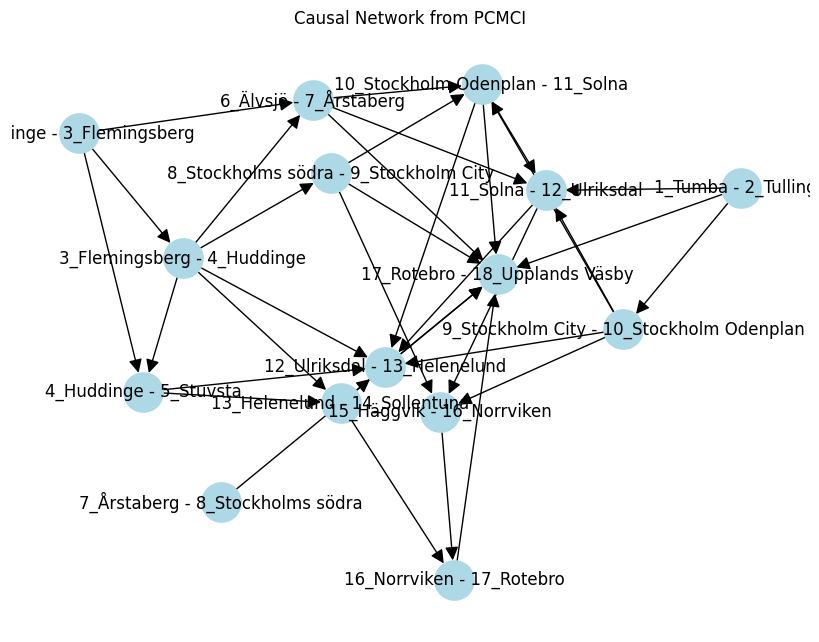

节点个数: 15
节点名称： ['1_Tumba - 2_Tullinge', '9_Stockholm City - 10_Stockholm Odenplan', '11_Solna - 12_Ulriksdal', '17_Rotebro - 18_Upplands Väsby', '2_Tullinge - 3_Flemingsberg', '3_Flemingsberg - 4_Huddinge', '4_Huddinge - 5_Stuvsta', '6_Älvsjö - 7_Årstaberg', '8_Stockholms södra - 9_Stockholm City', '12_Ulriksdal - 13_Helenelund', '13_Helenelund - 14_Sollentuna', '10_Stockholm Odenplan - 11_Solna', '7_Årstaberg - 8_Stockholms södra', '15_Häggvik - 16_Norrviken', '16_Norrviken - 17_Rotebro']


In [175]:
num_vars = p_matrix_clean.shape[0]
tau_max_plus1 = p_matrix_clean.shape[2]
alpha_level=0.05
v_matrix=results['val_matrix']

Gmax = nx.DiGraph()

for i in range(num_vars):       # target
    v_max=0
    imax,jmax,taumax=0,0,0
    for j in range(num_vars):   # source
        for tau in range(1,tau_max_plus1):

            if p_matrix_clean[i, j, tau]<=alpha_level :
              Gmax.add_edge(variable_names[i], variable_names[j], lag=tau) #tau!=0的因果链
              if v_matrix[i, j, tau]>v_max:
                v_max=v_matrix[i, j, tau]
                imax=i
                jmax=j
                taumax=tau
    # if imax!=0 or jmax!=0 or taumax!=0:
    #   Gmax.add_edge(variable_names[imax], variable_names[jmax], lag=taumax)
    # 生成val最强的传播路径，但是就是4-5-6-7-8---，看不出任何含义

plt.figure(figsize=(8, 6))
pos = nx.kamada_kawai_layout(Gmax)

nx.draw(Gmax, pos, with_labels=True, node_size=800, node_color='lightblue', arrowsize=20)
plt.title("Causal Network from PCMCI")
plt.show()

num_nodes = Gmax.number_of_nodes()
print("节点个数:", num_nodes)
print("节点名称：", list(Gmax.nodes()))

1. Diameter（直径）
定义：网络中最短路径的最大值，即：从一个节点能到达的最远节点的“最短路径长度”。但仅限于强连通子图（strongly connected component）
2. Link Density（连接密度）
定义：网络中实际存在的边数 / 所有可能存在的边数。
有向图中最大边数是n(n−1)。站点之间存在因果关系的紧密程度。
3. Assortativity（同配性）
定义：度同配性系数。衡量连接的节点是否倾向于有相似度（比如高度节点连高度节点）。可以分析入度或出度的相关性.代表含义：高因果影响节点是否倾向于彼此连接。
4. Network Efficiency（网络效率）
定义：网络中所有成对节点的平均“信息传递效率”，即平均路径长度的倒数。代表延误因果传播是否“快速”。
5. Community Detection（社区结构）
定义：将网络划分成若干个“紧密连接”的子群体（社区）。在弱连通或传播性较强的图中有价值。一组站点在传播链中彼此关系紧密（可能是子线路或站点组）
6. Network Motifs（网络模体）
定义：网络中出现频率远高于随机网络的微结构子图（如三角形、链式三元组等）。
适用于你：是，非常适用于因果图，可以找出常见传播结构（如 A→B→C）。最常见的传播模式结构。

In [176]:
# 获取最大强连通子图
largest_scc = max(nx.strongly_connected_components(G), key=len)
G_scc = G.subgraph(largest_scc)

diameter = nx.diameter(G_scc)
print(f"Diameter: {diameter}")

n = G.number_of_nodes()
m = G.number_of_edges()
density = m / (n * (n - 1))
print(f"Link Density: {density:.4f}")

assortativity = nx.degree_assortativity_coefficient(G, x='out', y='out')
print(f"Assortativity (out-degree): {assortativity:.4f}")

efficiency = nx.global_efficiency(G.to_undirected())  # 或 largest_scc.to_undirected()
print(f"Global Efficiency: {efficiency:.4f}")

from networkx.algorithms.community import greedy_modularity_communities

communities = greedy_modularity_communities(G.to_undirected())
for i, c in enumerate(communities):
    print(f"Community {i}: {sorted(c)}")

triads = nx.triadic_census(G)  # 只适用于有向图且至少3个节点
print(triads)

Diameter: 0
Link Density: 0.1952
Assortativity (out-degree): 0.2801
Global Efficiency: 0.6857
Community 0: ['12_Ulriksdal - 13_Helenelund', '13_Helenelund - 14_Sollentuna', '2_Tullinge - 3_Flemingsberg', '3_Flemingsberg - 4_Huddinge', '4_Huddinge - 5_Stuvsta', '7_Årstaberg - 8_Stockholms södra']
Community 1: ['10_Stockholm Odenplan - 11_Solna', '15_Häggvik - 16_Norrviken', '16_Norrviken - 17_Rotebro', '17_Rotebro - 18_Upplands Väsby', '8_Stockholms södra - 9_Stockholm City']
Community 2: ['11_Solna - 12_Ulriksdal', '1_Tumba - 2_Tullinge', '6_Älvsjö - 7_Årstaberg', '9_Stockholm City - 10_Stockholm Odenplan']
{'003': 107, '012': 191, '102': 0, '021D': 27, '021U': 40, '021C': 62, '111D': 0, '111U': 0, '030T': 28, '030C': 0, '201': 0, '120D': 0, '120U': 0, '120C': 0, '210': 0, '300': 0}


影响（out）受影响（in）的val值和排序

In [177]:
# 遍历所有 target, source, tau 组合
num_vars = p_matrix_clean.shape[0]
tau_max_plus1 = p_matrix_clean.shape[2]
alpha_level=0.05
v_matrix=results['val_matrix']
ki=[0]*num_vars
kj=[0]*num_vars

for i in range(num_vars):       # target
    for j in range(num_vars):   # source
        for tau in range(tau_max_plus1):
            if p_matrix_clean[i, j, tau]<=alpha_level:
              ki[i]+=v_matrix[i, j, tau]  # k[i]为影响别人 k[j]为受影响
              kj[j]+=v_matrix[i, j, tau]

k = [x + y for x, y in zip(ki, kj)]
# 整合为 DataFrame
df_k = pd.DataFrame({
    'station': df_delay.columns,
    'influence_received': ki
})

# 按影响值降序排序
df_k_sorted = df_k.sort_values(by='influence_received', ascending=False).reset_index(drop=True)

# 输出结果
print(df_k_sorted)

                                     station  influence_received
0                3_Flemingsberg - 4_Huddinge            4.789996
1                       1_Tumba - 2_Tullinge            3.142264
2      8_Stockholms södra - 9_Stockholm City            2.589812
3           10_Stockholm Odenplan - 11_Solna            2.522148
4                     6_Älvsjö - 7_Årstaberg            2.509893
5               12_Ulriksdal - 13_Helenelund            2.398850
6   9_Stockholm City - 10_Stockholm Odenplan            2.346345
7                2_Tullinge - 3_Flemingsberg            2.168814
8                    11_Solna - 12_Ulriksdal            1.891018
9                     4_Huddinge - 5_Stuvsta            1.799576
10             13_Helenelund - 14_Sollentuna            1.759713
11                 15_Häggvik - 16_Norrviken            0.654153
12          7_Årstaberg - 8_Stockholms södra            0.612268
13                 16_Norrviken - 17_Rotebro            0.573611
14                      5

还有什么能够参考到weight的复杂网络指标？？
